In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_excel(r'C:\Users\Dhyan Somaiya\Downloads\TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',sheet_name='Existing employees')
data1=pd.read_excel(r'C:\Users\Dhyan Somaiya\Downloads\TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',sheet_name='Employees who have left')
data['Attrition']=0
data1['Attrition']=1
new_data=data1.merge(data,how='outer',sort=True)

In [3]:
data.info()
print()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 11 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
Attrition                11428 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 982.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours   

In [4]:
print(data.isnull().sum())
print()
print(data1.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Attrition                0
dtype: int64

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Attrition                0
dtype: int64


In [5]:
# Basic Descriptive sstatistics
print(data.describe())
print()
print(data1.describe())

             Emp ID  satisfaction_level  last_evaluation  number_project  \
count  11428.000000        11428.000000     11428.000000    11428.000000   
mean    7812.340742            0.666810         0.715473        3.786664   
std     3453.947461            0.217104         0.162005        0.979884   
min     2001.000000            0.120000         0.360000        2.000000   
25%     4857.750000            0.540000         0.580000        3.000000   
50%     7714.500000            0.690000         0.710000        4.000000   
75%    10571.250000            0.840000         0.850000        4.000000   
max    14211.000000            1.000000         1.000000        6.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          11428.000000        11428.000000   11428.000000   
mean             199.060203            3.380032       0.175009   
std               45.682731            1.562348       0.379991   
min               96.000000            2.000000    

In [6]:
# To understand number of levels in each variables 
print(data.nunique())
# To understand number of levels in each variables 
data1.nunique()

Emp ID                   11428
satisfaction_level          89
last_evaluation             65
number_project               5
average_montly_hours       192
time_spend_company           8
Work_accident                2
promotion_last_5years        2
dept                        10
salary                       3
Attrition                    1
dtype: int64


Emp ID                   3571
satisfaction_level         81
last_evaluation            54
number_project              6
average_montly_hours      164
time_spend_company          5
Work_accident               2
promotion_last_5years       2
dept                       10
salary                      3
Attrition                   1
dtype: int64

In [7]:
data[data['satisfaction_level']<0.4].groupby('dept').mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
dept,,,,,,,,,
IT,7977.446809,0.237872,0.695426,4.223404,194.606383,4.319149,0.170213,0.000000,0.0
RandD,6927.434783,0.239239,0.687826,4.195652,199.402174,4.304348,0.206522,0.054348,0.0
accounting,7714.612500,0.246625,0.659750,4.075000,199.350000,4.025000,0.237500,0.037500,0.0
hr,7107.606557,0.246230,0.672295,4.114754,201.000000,4.180328,0.131148,0.016393,0.0
management,9856.898305,0.247458,0.748136,4.254237,185.745763,4.898305,0.050847,0.169492,0.0
marketing,8295.884615,0.240641,0.677949,4.115385,199.320513,4.666667,0.141026,0.089744,0.0
product_mng,8351.611111,0.246000,0.679333,4.244444,191.800000,3.944444,0.155556,0.000000,0.0
sales,8199.707895,0.232289,0.681000,4.265789,191.592105,4.410526,0.194737,0.010526,0.0
support,7495.860215,0.247366,0.693817,4.134409,191.967742,3.967742,0.188172,0.010753,0.0


In [8]:
data.corr()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Emp ID,1.000000,-0.008605,-0.018822,-0.004694,0.006287,0.250814,0.001522,0.115994,NaN
satisfaction_level,-0.008605,1.000000,0.086357,-0.092799,0.055354,-0.168791,-0.003128,0.001228,NaN
last_evaluation,-0.018822,0.086357,1.000000,0.040306,0.090304,-0.017682,-0.007416,-0.002034,NaN
number_project,-0.004694,-0.092799,0.040306,1.000000,0.070289,0.079943,0.001098,0.001676,NaN
average_montly_hours,0.006287,0.055354,0.090304,0.070289,1.000000,-0.016444,0.003285,0.007871,NaN
time_spend_company,0.250814,-0.168791,-0.017682,0.079943,-0.016444,1.000000,0.027261,0.088629,NaN
Work_accident,0.001522,-0.003128,-0.007416,0.001098,0.003285,0.027261,1.000000,0.028084,NaN
promotion_last_5years,0.115994,0.001228,-0.002034,0.001676,0.007871,0.088629,0.028084,1.000000,NaN
Attrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data1.corr()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Emp ID,1.000000,0.000791,-0.016324,-0.013354,-0.009820,-0.001109,-0.024144,0.016686,NaN
satisfaction_level,0.000791,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516,NaN
last_evaluation,-0.016324,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992,NaN
number_project,-0.013354,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301,NaN
average_montly_hours,-0.009820,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475,NaN
time_spend_company,-0.001109,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888,NaN
Work_accident,-0.024144,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214,NaN
promotion_last_5years,0.016686,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000,NaN
Attrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mean_satisfaction = round(data1['satisfaction_level'].mean(),2)
mean_satisfaction

0.44

In [11]:
print((round(len(data1[data1['satisfaction_level'] < mean_satisfaction])/len(data1)*100,2)),'% employees who had their satisfaction level low than the average had left the job')

60.29 % employees who had their satisfaction level low than the average had left the job


In [12]:
mean_satisfaction = round(data['satisfaction_level'].mean(),2)
mean_satisfaction

0.67

In [13]:
print((round(len(data[data['satisfaction_level'] < mean_satisfaction])/len(data)*100,2)),'% of existing employees had their satisfaction level low than the average had left the job')

46.57 % of existing employees had their satisfaction level low than the average had left the job


In [14]:
pd.pivot_table(data=new_data,index='dept',aggfunc='sum')

,Attrition,Emp ID,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company
dept,,,,,,,,,
IT,273,9394950,164,248119,879.55,4683,3,758.46,4256
RandD,121,5334559,134,158030,560.44,3033,27,487.80,2650
accounting,204,5565379,96,154292,550.49,2934,14,446.51,2702
hr,215,5200261,89,146828,523.84,2701,15,442.52,2480
management,91,5946799,103,126787,456.12,2432,69,391.45,2711
marketing,203,6650945,138,171073,614.23,3164,43,530.76,3063
product_mng,198,7302969,132,180369,644.71,3434,0,558.91,3135
sales,1014,31782256,587,831773,2938.23,15634,100,2543.81,14631
support,555,16077353,345,447490,1611.81,8479,20,1378.19,7563


In [15]:
pd.pivot_table(data=new_data,index='dept',aggfunc='mean')

,Attrition,Emp ID,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company
dept,,,,,,,,,
IT,0.222494,7656.845966,0.133659,202.215974,0.716830,3.816626,0.002445,0.618142,3.468623
RandD,0.153748,6778.346887,0.170267,200.800508,0.712122,3.853875,0.034307,0.619822,3.367217
accounting,0.265971,7256.035202,0.125163,201.162973,0.717718,3.825293,0.018253,0.582151,3.522816
hr,0.290934,7036.889039,0.120433,198.684709,0.708850,3.654939,0.020298,0.598809,3.355886
management,0.144444,9439.363492,0.163492,201.249206,0.724000,3.860317,0.109524,0.621349,4.303175
marketing,0.236597,7751.684149,0.160839,199.385781,0.715886,3.687646,0.050117,0.618601,3.569930
product_mng,0.219512,8096.417960,0.146341,199.965632,0.714756,3.807095,0.000000,0.619634,3.475610
sales,0.244928,7676.873430,0.141787,200.911353,0.709717,3.776329,0.024155,0.614447,3.534058
support,0.248991,7212.809780,0.154778,200.758188,0.723109,3.803948,0.008973,0.618300,3.393001


In [16]:
pd.pivot_table(data=new_data,index=['dept','salary'],aggfunc='mean')

Attrition        Emp ID  Work_accident  \
dept        salary                                           
IT          high     0.048193   7816.602410       0.048193   
            low      0.282430   7388.684729       0.146141   
            medium   0.181308   7937.314019       0.132710   
RandD       high     0.078431   7138.470588       0.176471   
            low      0.151099   6628.579670       0.195055   
            medium   0.166667   6875.521505       0.145161   
accounting  high     0.067568   8312.256757       0.202703   
            low      0.276536   6885.357542       0.111732   
            medium   0.298507   7418.847761       0.122388   
hr          high     0.133333   7516.977778       0.088889   
            low      0.274627   6351.713433       0.137313   
            medium   0.325905   7616.080780       0.108635   
management  high     0.004444  11986.404444       0.160000   
            low      0.327778   7295.705556       0.166667   
            medium   0.137778   8607.248889       0.164444   
marketing   high     0.112500   8947.937500       0.162500   
            low      0.313433   7497.840796       0.154229   
            medium   0.180851   7768.558511       0.167553   
product_mng high     0.088235   8710.794118       0.191176   
            low      0.232816   7990.922395       0.150776   
            medium   0.227154   8111.563969       0.133159   
sales       high     0.052045   7738.739777       0.137546   
            low      0.332063   7626.365412       0.126251   
            medium   0.170993   7727.310384       0.160835   
support     high     0.056738   7493.156028       0.219858   
            low      0.339442   7459.530541       0.151832   
            medium   0.167728   6870.696391       0.148620   
technical   high     0.124378   7746.004975       0.149254   
            low      0.275510   7010.187318       0.142128   
            medium   0.256321   7028.862249       0.136007   

                    average_montly_hours  last_evaluation  number_project  \
dept        salary                                                          
IT          high              194.927711         0.716627        3.867470   
            low               201.382594         0.715665        3.794745   
            medium            204.295327         0.718187        3.833645   
RandD       high              199.745098         0.700588        3.764706   
            low               198.747253         0.714176        3.804945   
            medium            202.954301         0.711694        3.913978   
accounting  high              205.905405         0.724595        3.905405   
            low               199.899441         0.713883        3.801676   
            medium            201.465672         0.720299        3.832836   
hr          high              209.066667         0.743778        3.888889   
            low               202.456716         0.717821        3.692537   
            medium            193.863510         0.696100        3.590529   
management  high              200.248889         0.715822        3.777778   
            low               200.744444         0.712833        3.777778   
            medium            202.653333         0.741111        4.008889   
marketing   high              185.575000         0.663625        3.425000   
            low               204.487562         0.727587        3.751244   
            medium            196.869681         0.714495        3.675532   
product_mng high              194.632353         0.665735        3.705882   
            low               201.048780         0.725831        3.824834   
            medium            199.637076         0.710418        3.804178   
sales       high              201.178439         0.699814        3.858736   
            low               200.363030         0.709247        3.757980   
            medium            201.520316         0.711778        3.785553   
support     high              203

In [17]:
pd.pivot_table(data=new_data,index=['dept','salary'],aggfunc='sum')

Attrition    Emp ID  Work_accident  average_montly_hours  \
dept        salary                                                             
IT          high            4    648778              4                 16179   
            low           172   4499709             89                122642   
            medium         97   4246463             71                109298   
RandD       high            4    364062              9                 10187   
            low            55   2412803             71                 72344   
            medium         62   2557694             54                 75499   
accounting  high            5    615107             15                 15237   
            low            99   2464958             40                 71564   
            medium        100   2485314             41                 67491   
hr          high            6    338264              4                  9408   
            low            92   2127824             46                 67823   
            medium        117   2734173             39                 69597   
management  high            1   2696941             36                 45056   
            low            59   1313227             30                 36134   
            medium         31   1936631             37                 45597   
marketing   high            9    715835             13                 14846   
            low           126   3014132             62                 82204   
            medium         68   2920978             63                 74023   
product_mng high            6    592334             13                 13235   
            low           105   3603906             68                 90673   
            medium         87   3106729             51                 76461   
sales       high           14   2081721             37                 54117   
            low           697  16007741            265                420562   
            medium        303  13692794            285                357094   
support     high            8   1056535             31                 28762   
            low           389   8548622            174                227940   
            medium        158   6472196            140                190788   
technical   high           25   1556947             30                 40209   
            low           378   9617977            195                278605   
            medium        294   8062105            156                231979   

                    last_evaluation  number_project  promotion_last_5years  \
dept        salary                                                           
IT          high              59.48             321                      0   
            low              435.84            2311                      2   
            medium           384.23            2051                      1   
RandD       high              35.73             192                      1   
            low              259.96            1385                      3   
            medium           264.75            1456                     23   
accounting  high              53.62             289                      6   
            low              255.57            1361                      2   
            medium           241.30            1284                      6   
hr          high              33.47             175                      2   
            low              240.47            1237                      2   
            medium           249.90            1289                     11   
management  high             161.06             850                     45   
            low              128.31             680                      7   
            medium           166.75             902                     17   
marketing   high              53.09             274                      5   
            low              292.49            1508    

In [18]:
a = 0
b = 0
for i in new_data['Work_accident']:
    if i == 0:
        a+=1
    elif i == 1:
        b+=1
print(a,"employees didn't had a work accident")
print(b,"employees had a work accident")

12830 employees didn't had a work accident
2169 employees had a work accident


In [19]:
print(data['average_montly_hours'].mean(),"average monthly hours spent by the existing employees")
print(data1['average_montly_hours'].mean(),"average monthly hours spent by the employees who had left")
print(new_data['average_montly_hours'].mean(),"average monthly hours spent by all the employees")
print()
print("From existing employees,",len(data[data['average_montly_hours']>=199]),"employees spent 199 average monthly hours")
print("From employees who had left,",len(data1[data1['average_montly_hours']>=207]),"employees spent 207 average monthly hours")
print("From all the employees,",len(new_data[new_data['average_montly_hours']>=201]),"employees spent 201 average monthly hours")

199.0602030101505 average monthly hours spent by the existing employees
207.41921030523662 average monthly hours spent by the employees who had left
201.0503366891126 average monthly hours spent by all the employees

From existing employees, 5694 employees spent 199 average monthly hours
From employees who had left, 1903 employees spent 207 average monthly hours
From all the employees, 7475 employees spent 201 average monthly hours


In [20]:
a = 0
b = 0
c=0
for j in data['salary']:
    if j == 'low':
        a+=1
    elif j == 'medium':
        b+=1
    else:
        c+=1
print(a,"existing employees had their salary low")
print(b,"existing employees had their salary medium")
print(c,"existing employees had their salary high")

5144 existing employees had their salary low
5129 existing employees had their salary medium
1155 existing employees had their salary high


In [21]:
a = 0
b = 0
c=0
for j in data1['salary']:
    if j == 'low':
        a+=1
    elif j == 'medium':
        b+=1
    else:
        c+=1
print(a,"employees who had left had their salary low")
print(b,"employees who had left had their salary medium")
print(c,"employees who had left had their salary high")

2172 employees who had left had their salary low
1317 employees who had left had their salary medium
82 employees who had left had their salary high


In [22]:
print(data['number_project'].unique())
print(data1['number_project'].unique())

[4 2 5 3 6]
[2 5 7 6 4 3]


In [23]:
a = 0
b = 0
c = 0
d = 0
e = 0
for j in data['number_project']:
    if j == 4:
        a+=1
    elif j == 2:
        b+=1
    elif j ==5:
        c+=1
    elif j == 3:
        d+=1
    elif j == 6:
        e+=1
print(a,"employees who had left were assigned 4 projects")
print(b,"employees who had left were assigned 2 projects")
print(c,"employees who had left were assigned 5 projects")
print(d,"employees who had left were assigned 3 projects")
print(e,"employees who had left were assigned 6 projects")

3956 employees who had left were assigned 4 projects
821 employees who had left were assigned 2 projects
2149 employees who had left were assigned 5 projects
3983 employees who had left were assigned 3 projects
519 employees who had left were assigned 6 projects


In [24]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
for j in data1['number_project']:
    if j == 4:
        a+=1
    elif j == 2:
        b+=1
    elif j ==5:
        c+=1
    elif j == 3:
        d+=1
    elif j == 7:
        e+=1
    elif j == 6:
        f+=1
print(a,"employees who had left were assigned 4 projects")
print(b,"employees who had left were assigned 2 projects")
print(c,"employees who had left were assigned 5 projects")
print(d,"employees who had left were assigned 3 projects")
print(e,"employees who had left were assigned 7 projects")
print(f,"employees who had left were assigned 6 projects")

409 employees who had left were assigned 4 projects
1567 employees who had left were assigned 2 projects
612 employees who had left were assigned 5 projects
72 employees who had left were assigned 3 projects
256 employees who had left were assigned 7 projects
655 employees who had left were assigned 6 projects


In [25]:
low_data = data[data['salary']== 'low']
low_percent_data = (len(low_data)/len(data)) * 100
print(f'{round(low_percent_data,2)} percent of the existing employees who have their salary low')
low_data1 = data1[data1['salary']== 'low']
low_percent_data1 = (len(low_data1)/len(data1)) * 100
print(f'{round(low_percent_data1,2)} percent of the employees who had left had their salary low')

45.01 percent of the existing employees who have their salary low
60.82 percent of the employees who had left had their salary low


In [26]:
medium_data = data[data['salary']== 'medium']
medium_percent_data = (len(medium_data)/len(data)) * 100
print(f'{round(medium_percent_data,2)} percent of the existing employees who have their salary medium') 
medium_data1 = data1[data1['salary']== 'medium']
medium_percent_data1 = (len(medium_data1)/len(data1)) * 100
print(f'{round(medium_percent_data1,2)} percent of the  employees who had left had their salary medium')

44.88 percent of the existing employees who have their salary medium
36.88 percent of the  employees who had left had their salary medium


In [27]:
high_data = data[data['salary']== 'high']
high_percent_data = (len(high_data)/len(data)) * 100
print(f'{round(high_percent_data,2)} percent of the existing employees who have their salary high') 
high_data1 = data1[data1['salary']== 'high']
high_percent_data1 = (len(high_data1)/len(data1)) * 100
print(f'{round(high_percent_data1,2)} percent of the employees who had left had their salary high') 

10.11 percent of the existing employees who have their salary high
2.3 percent of the employees who had left had their salary high


In [28]:
department=Counter(new_data["dept"])
department1 = Counter(data["dept"])
s={}

for i in department.keys():
    print("From",i,",",(department[i]-department1[i]),"employees have left the job")
    s[i]=round(((department[i]-department1[i])/department[i])*100,2)

From sales , 1014 employees have left the job
From accounting , 204 employees have left the job
From hr , 215 employees have left the job
From technical , 697 employees have left the job
From support , 555 employees have left the job
From management , 91 employees have left the job
From IT , 273 employees have left the job
From product_mng , 198 employees have left the job
From marketing , 203 employees have left the job
From RandD , 121 employees have left the job


In [29]:
for i in s:
    print("From",i,",",s[i],"% of the employees leave the job")

From sales , 24.49 % of the employees leave the job
From accounting , 26.6 % of the employees leave the job
From hr , 29.09 % of the employees leave the job
From technical , 25.62 % of the employees leave the job
From support , 24.9 % of the employees leave the job
From management , 14.44 % of the employees leave the job
From IT , 22.25 % of the employees leave the job
From product_mng , 21.95 % of the employees leave the job
From marketing , 23.66 % of the employees leave the job
From RandD , 15.37 % of the employees leave the job


In [30]:
print("From existing employees,",len(data[data['promotion_last_5years']==1]),"employees were promoted")
print("From employees who had left,",len(data1[data1['promotion_last_5years']==1]),"employees were promoted")

From existing employees, 300 employees were promoted
From employees who had left, 19 employees were promoted


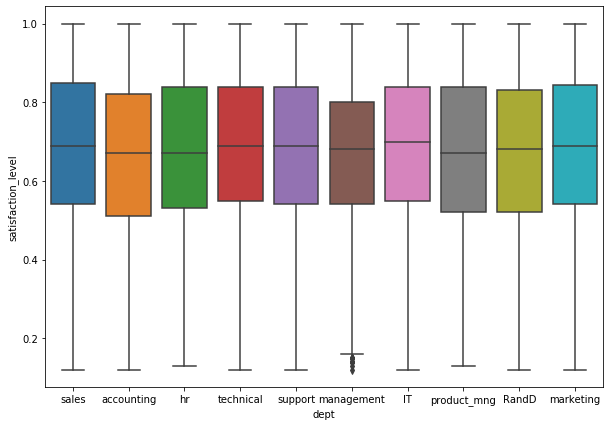

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(y=data['satisfaction_level'],x=data['dept'])
plt.show()

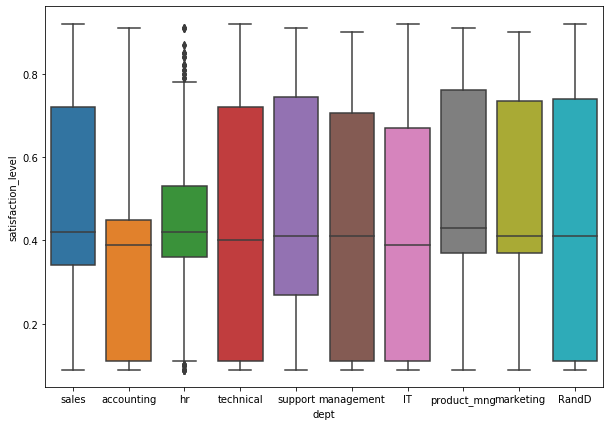

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(y=data1['satisfaction_level'],x=data1['dept'])
plt.show()

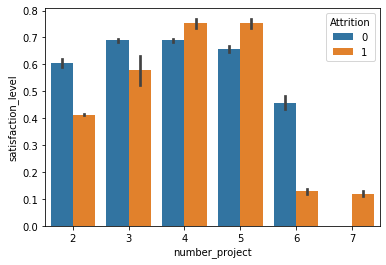

In [33]:
sns.barplot(x=new_data['number_project'],y=new_data['satisfaction_level'],hue=new_data['Attrition'])
plt.show()

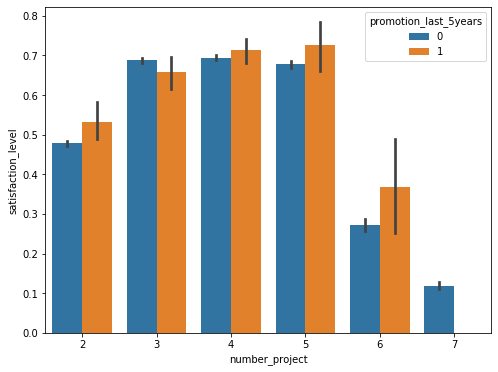

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=new_data['number_project'],y=new_data['satisfaction_level'],hue=new_data['promotion_last_5years'])
plt.show()

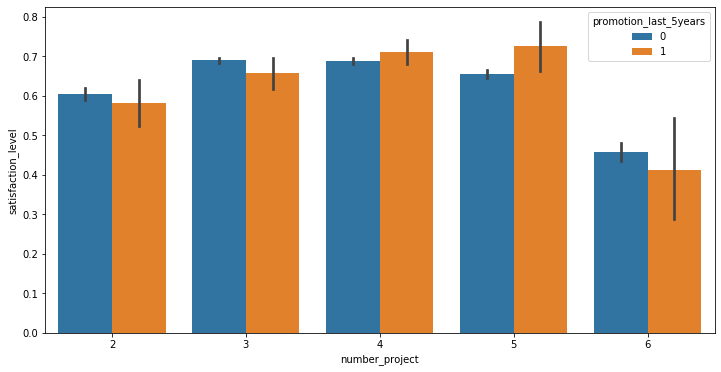

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['number_project'],y=data['satisfaction_level'],hue=data['promotion_last_5years'])
plt.show()

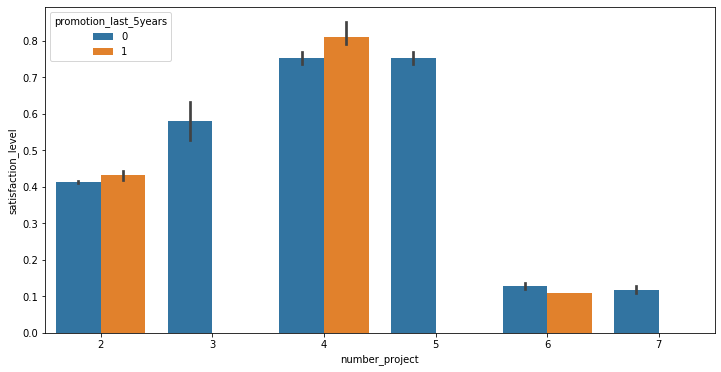

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=data1['number_project'],y=data1['satisfaction_level'],hue=data1['promotion_last_5years'])
plt.show()

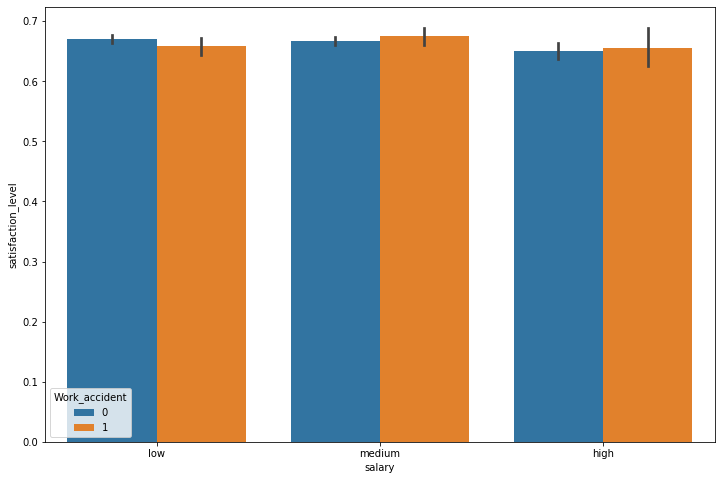

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['salary'],y=data['satisfaction_level'],hue=data['Work_accident'])
plt.show()

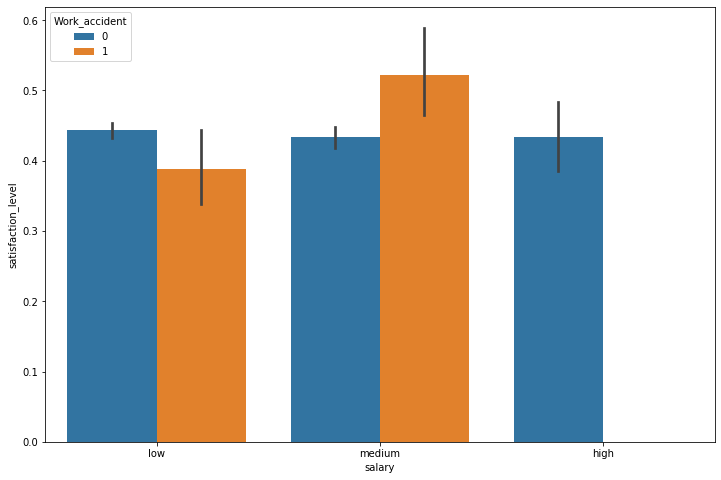

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x=data1['salary'],y=data1['satisfaction_level'],hue=data1['Work_accident'])
plt.show()

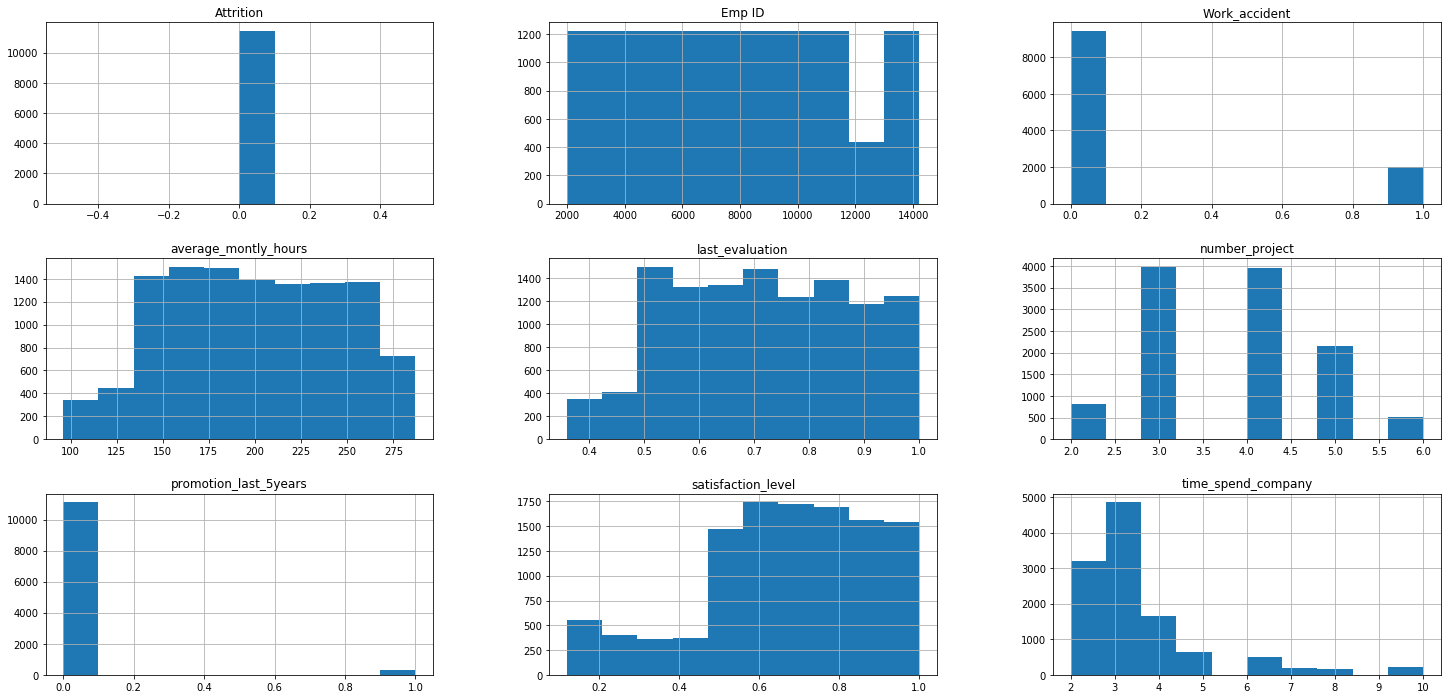

In [39]:
data.hist(figsize=(25,12))
plt.show()

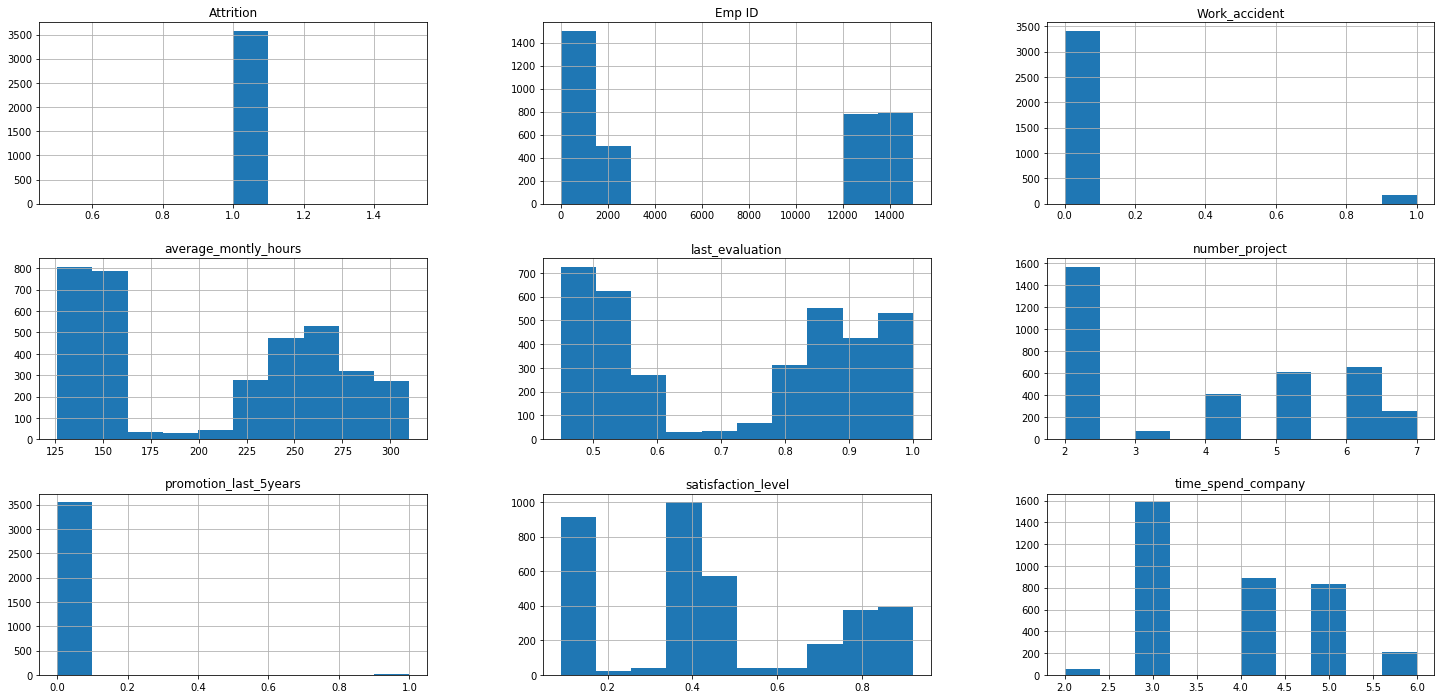

In [40]:
data1.hist(figsize=(25,12))
plt.show()

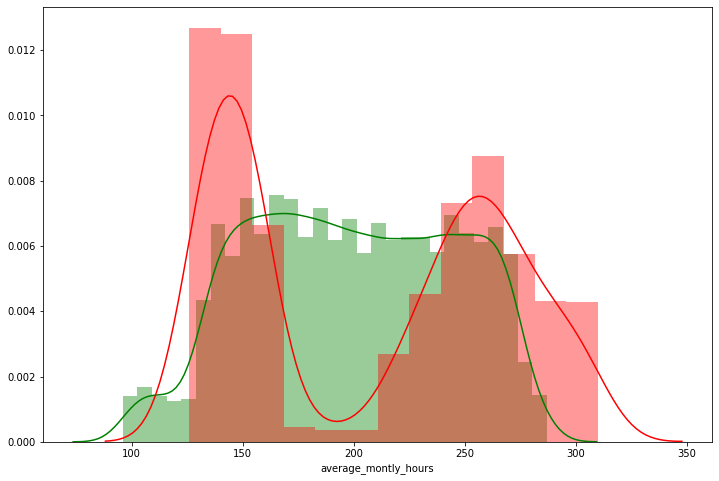

In [41]:
plt.figure(figsize=(12,8))
sns.distplot(data["average_montly_hours"],color="g")
sns.distplot(data1["average_montly_hours"],color="r")
plt.show()

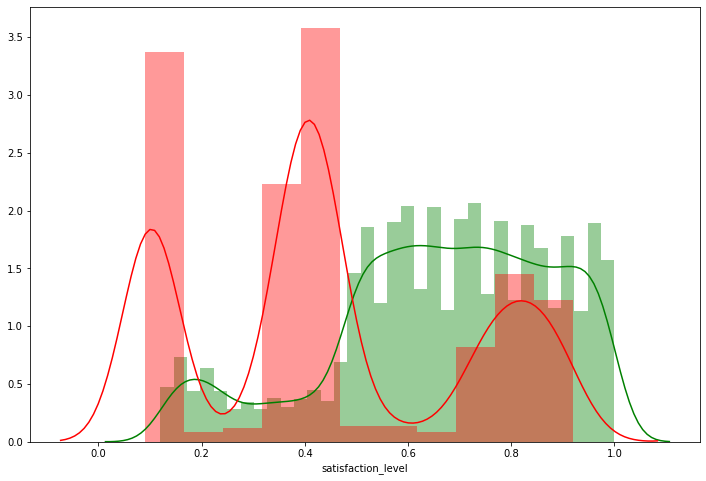

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(data["satisfaction_level"],color="g")
sns.distplot(data1["satisfaction_level"],color="r")
plt.show()

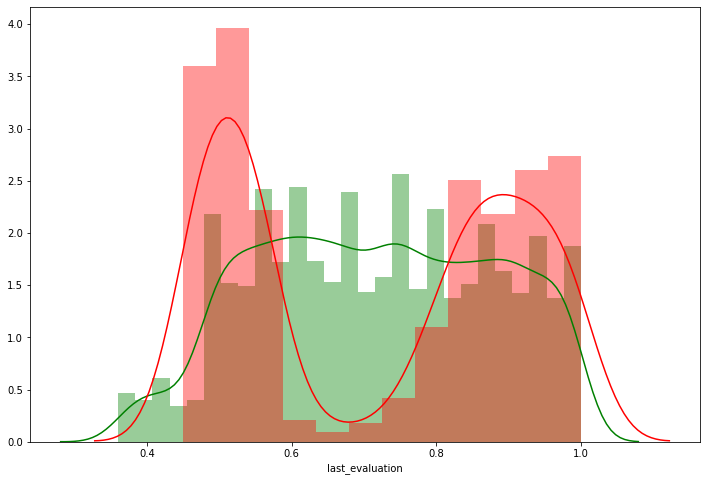

In [43]:
plt.figure(figsize=(12,8))
sns.distplot(data["last_evaluation"],color="g")
sns.distplot(data1["last_evaluation"],color="r")
plt.show()

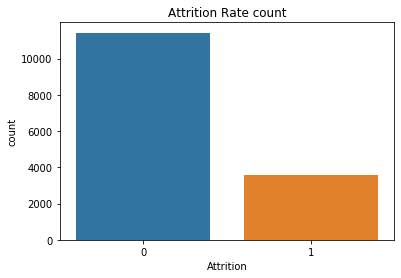

In [44]:
# From this countplot we can see that around 3500 employees have left while around 11000 employees haven't left
plt.figure()
sns.countplot(x='Attrition',data=new_data)
plt.title('Attrition Rate count')
plt.show()

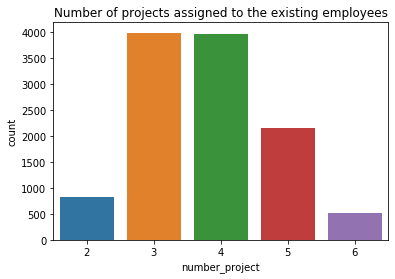

In [45]:
# From this countplot we can see that the most of the existing employees were assigned approx 3 to 5 projects each
plt.figure()
sns.countplot(x='number_project',data=data)
plt.title('Number of projects assigned to the existing employees')
plt.show()

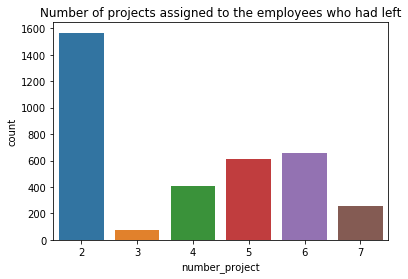

In [46]:
# From this countplot we can see that the employees who had left had been assigned mostly 2  projects each
plt.figure()
sns.countplot(x='number_project',data=data1)
plt.title('Number of projects assigned to the employees who had left')
plt.show()

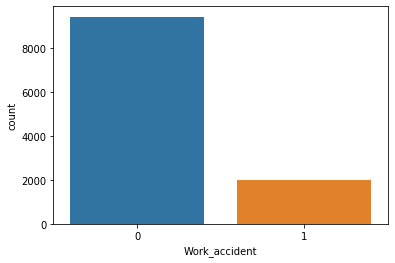

In [47]:
plt.figure()
sns.countplot(x='Work_accident',data=data)
plt.show()

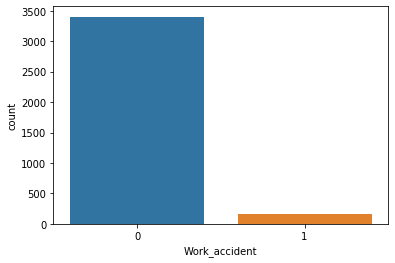

In [48]:
plt.figure()
sns.countplot(x='Work_accident',data=data1)
plt.show()

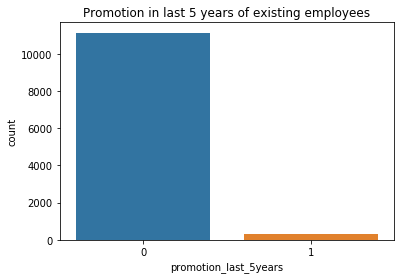

In [49]:
plt.figure()
sns.countplot(x='promotion_last_5years',data=data)
plt.title('Promotion in last 5 years of existing employees')
plt.show()

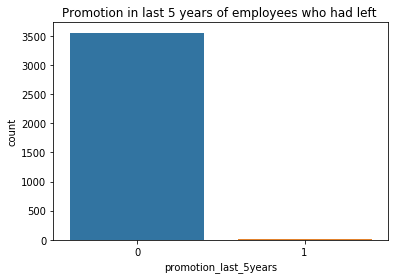

In [50]:
plt.figure()
sns.countplot(x='promotion_last_5years',data=data1)
plt.title('Promotion in last 5 years of employees who had left ')
plt.show()

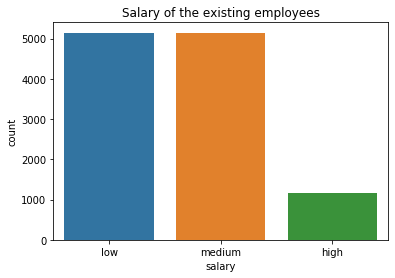

In [51]:
plt.figure()
sns.countplot(x='salary',data=data)
plt.title('Salary of the existing employees')
plt.show()

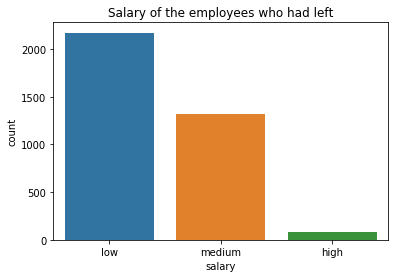

In [52]:
plt.figure()
sns.countplot(x='salary',data=data1)
plt.title('Salary of the employees who had left')
plt.show()

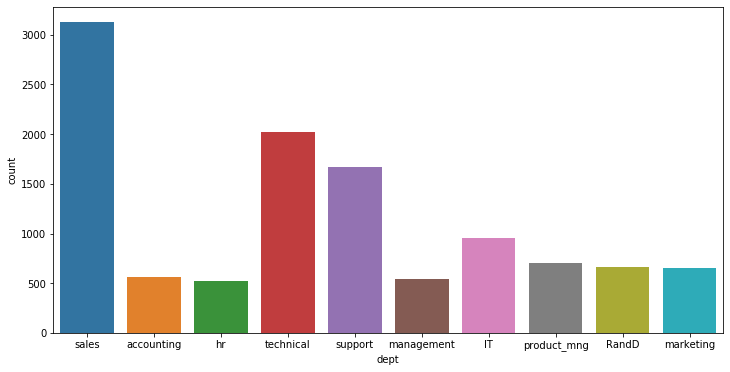

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(data['dept'])
plt.show()

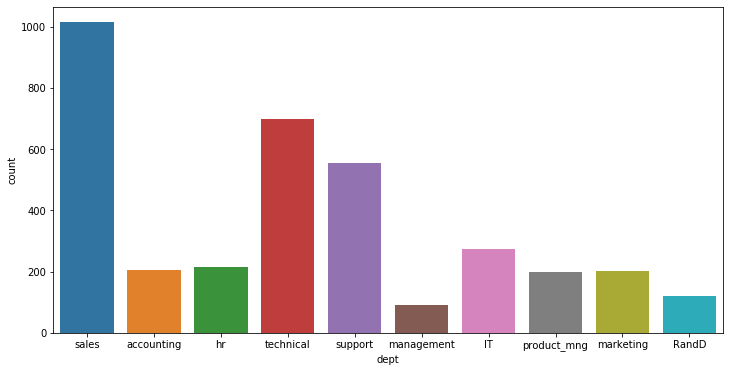

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(data1['dept'])
plt.show()

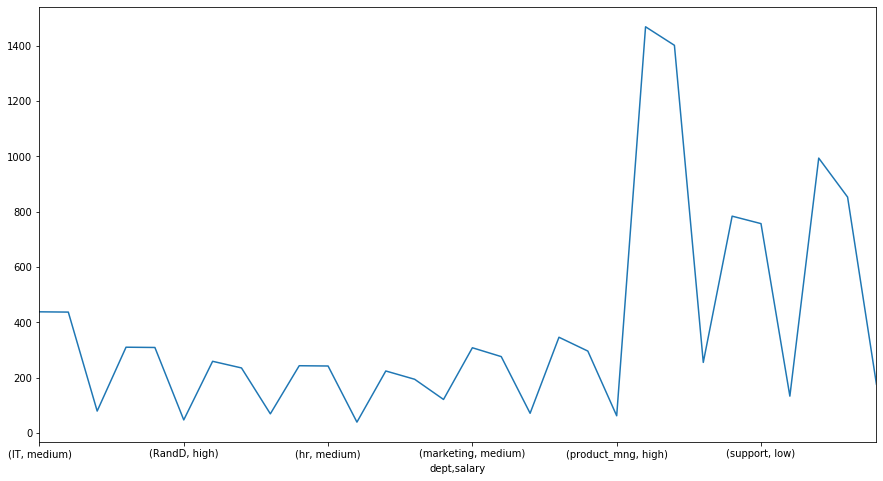

In [55]:
plt.figure(figsize=(15,8))
data.groupby(['dept'])['salary'].value_counts().plot()
plt.show()

<Figure size 432x288 with 0 Axes>

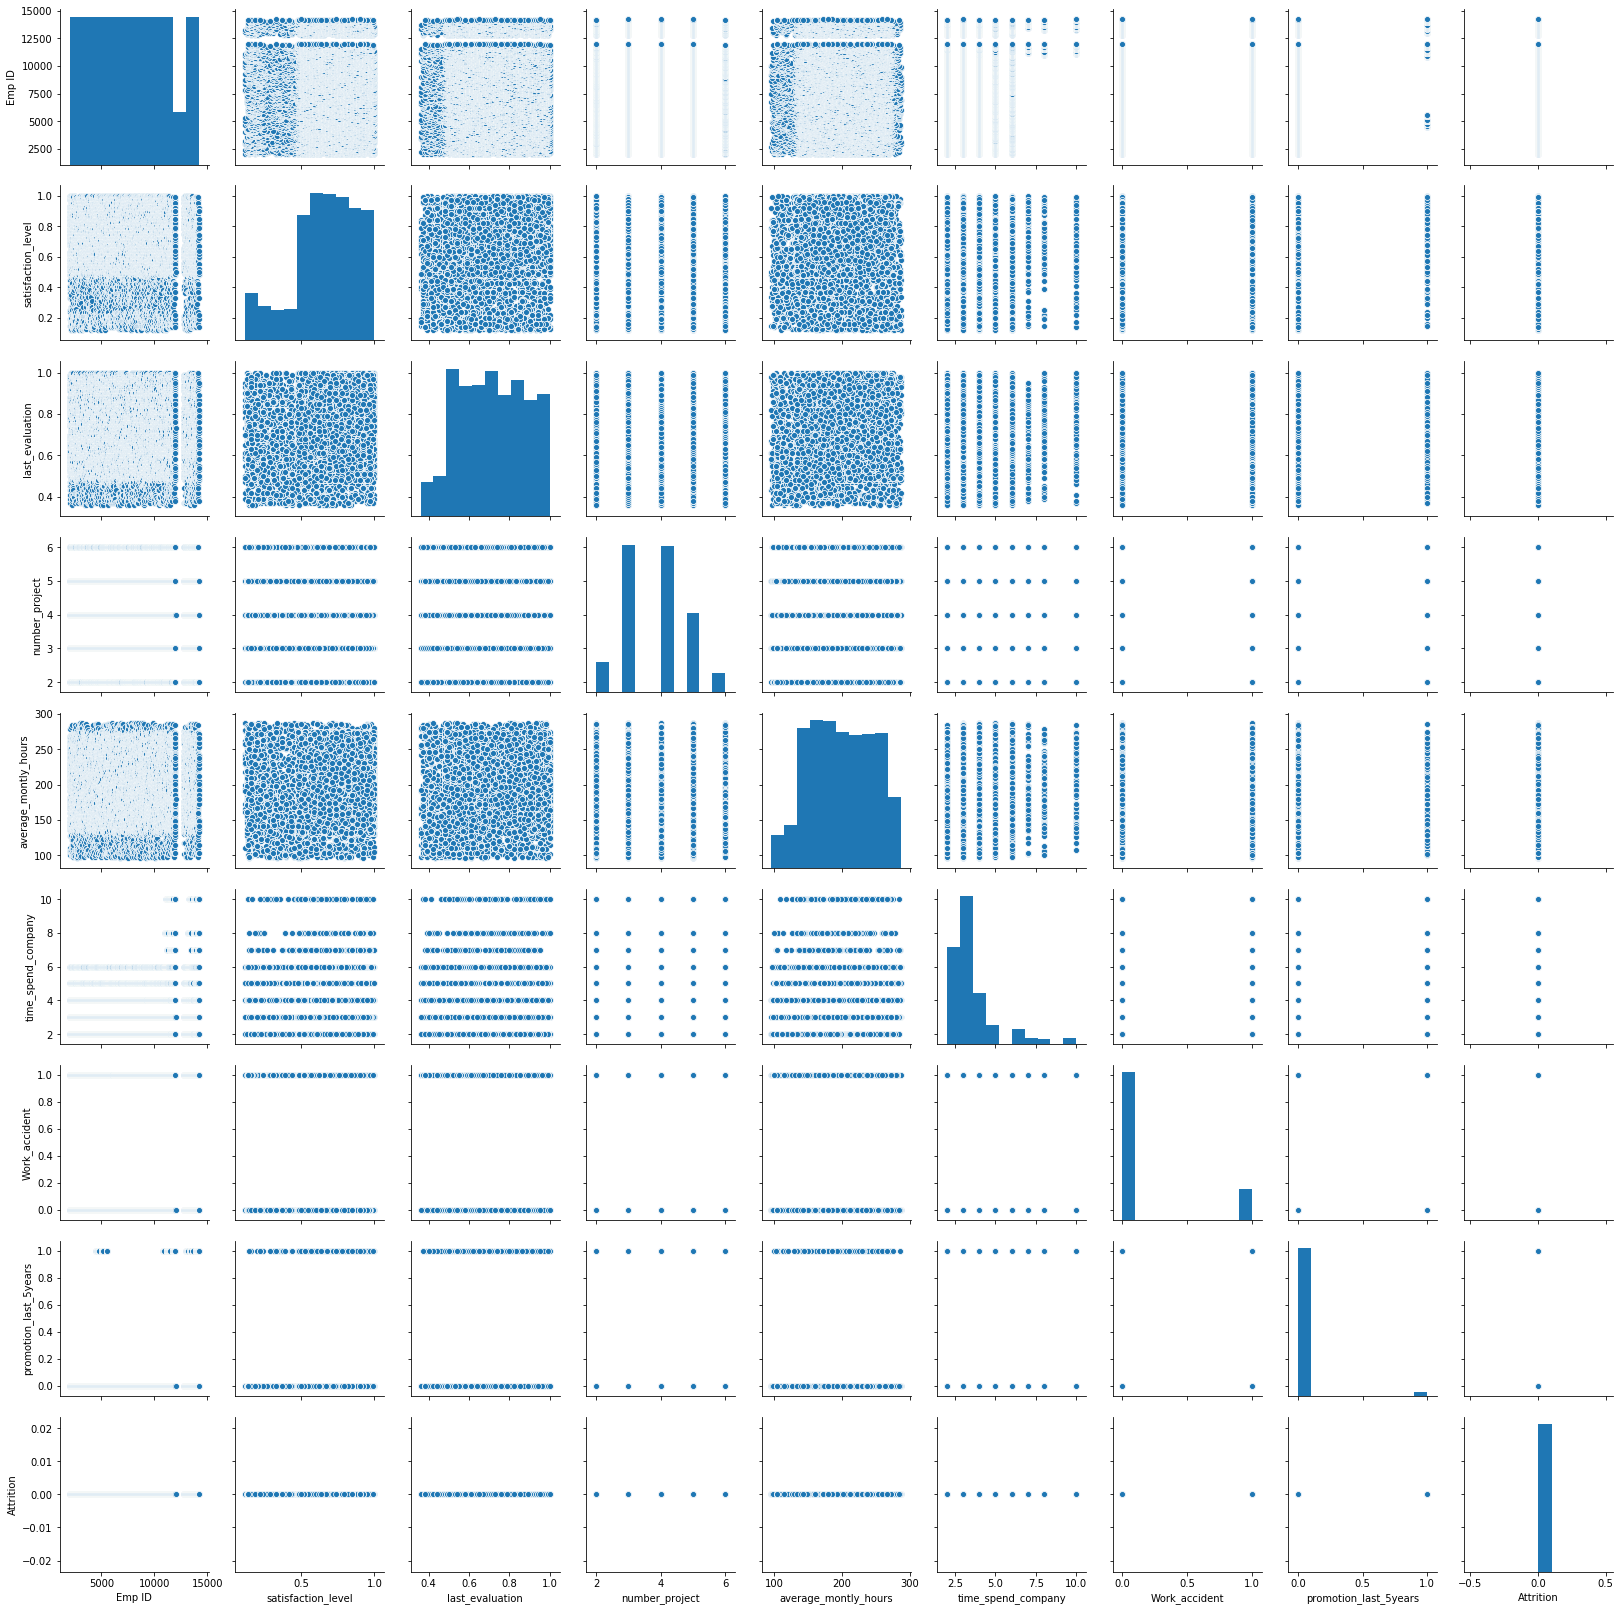

In [56]:
plt.figure()
sns.pairplot(data)
plt.show()

<Figure size 432x288 with 0 Axes>

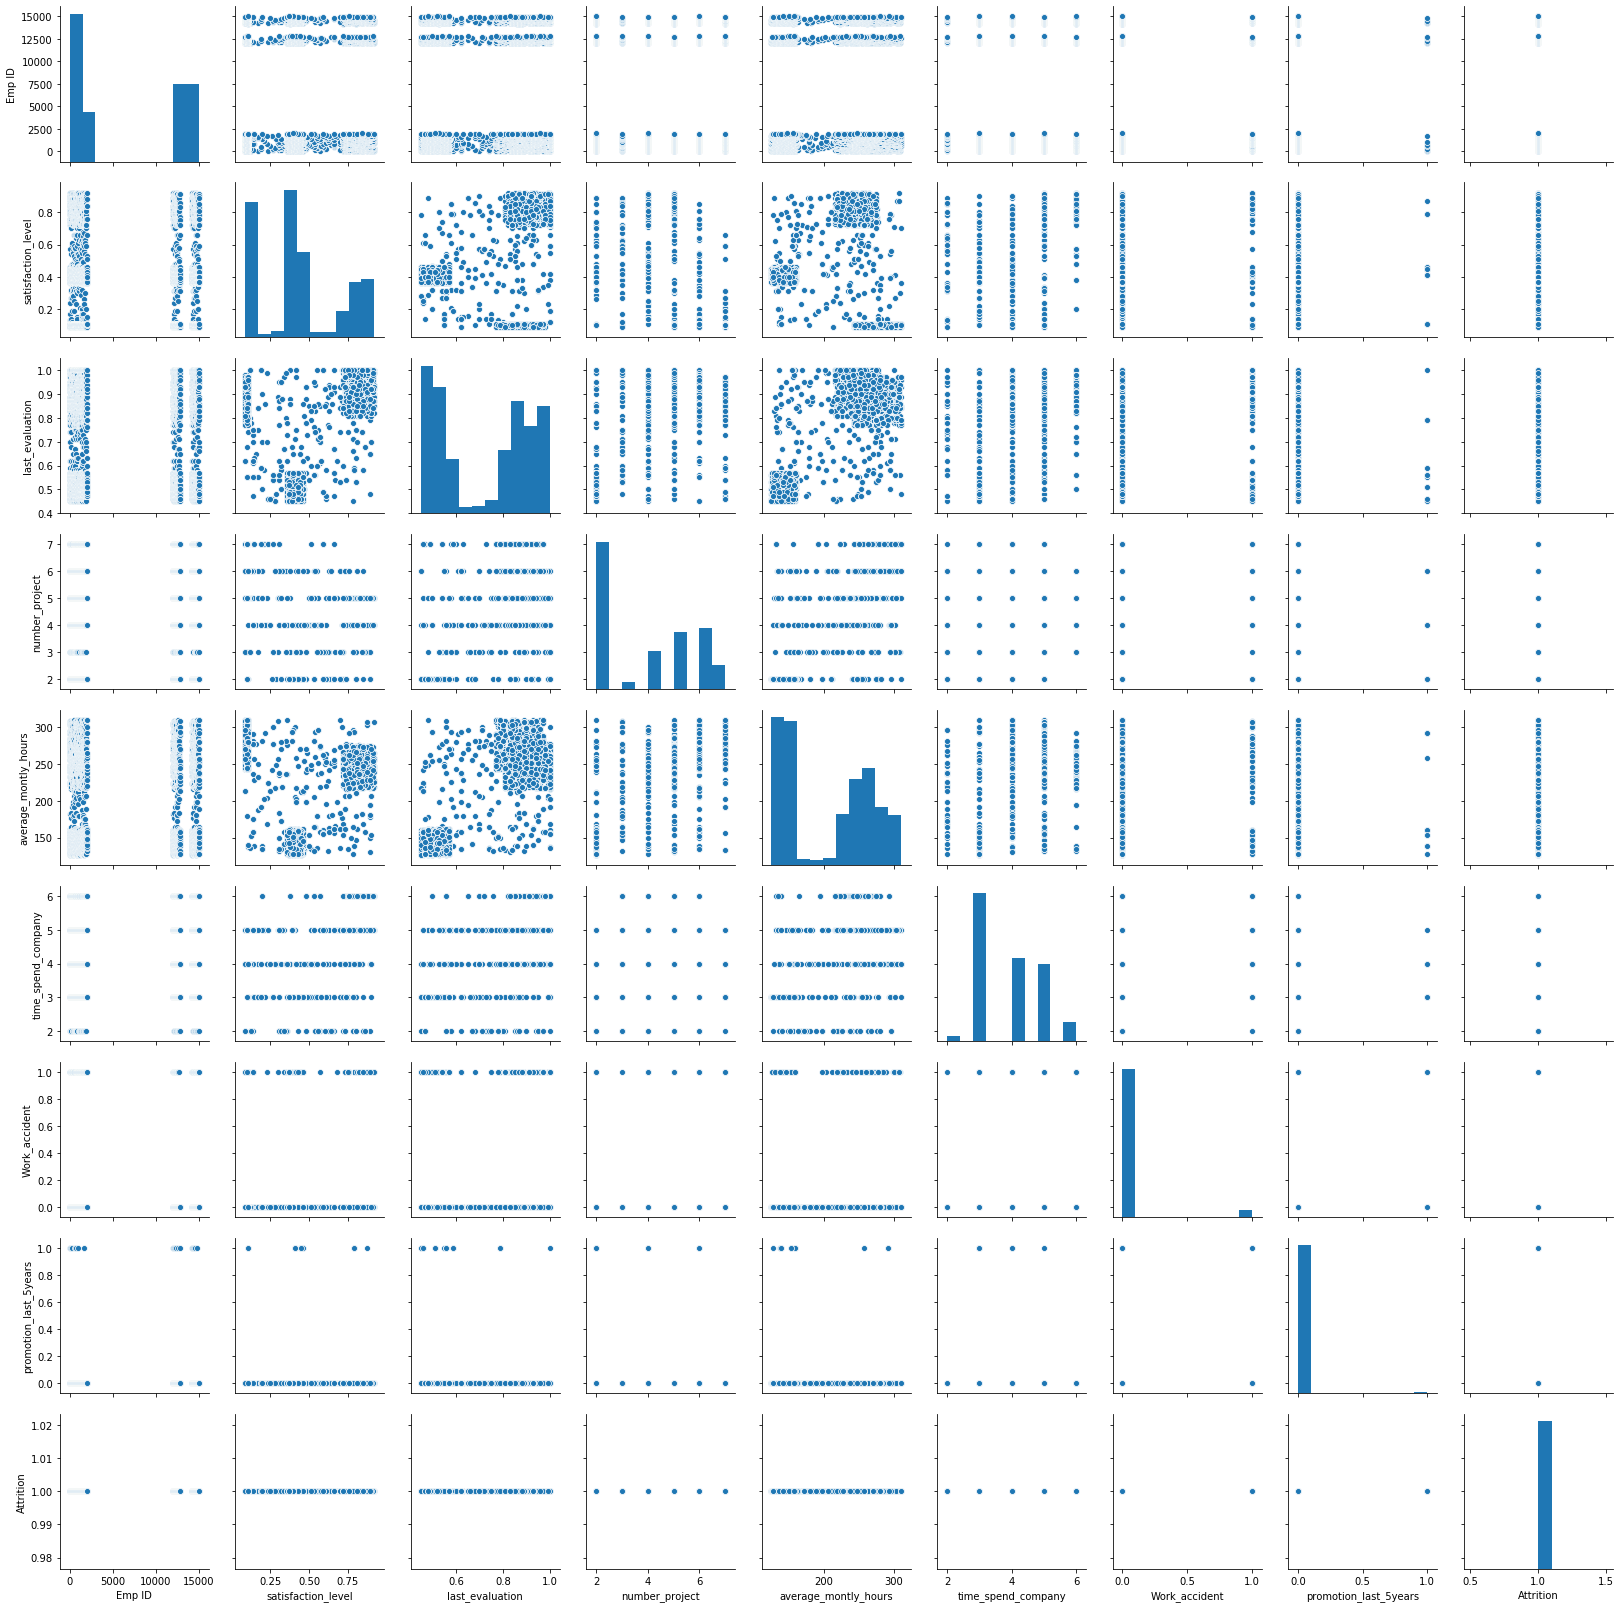

In [57]:
plt.figure()
sns.pairplot(data1)
plt.show()

Text(0.5, 1, 'Correlation between features')

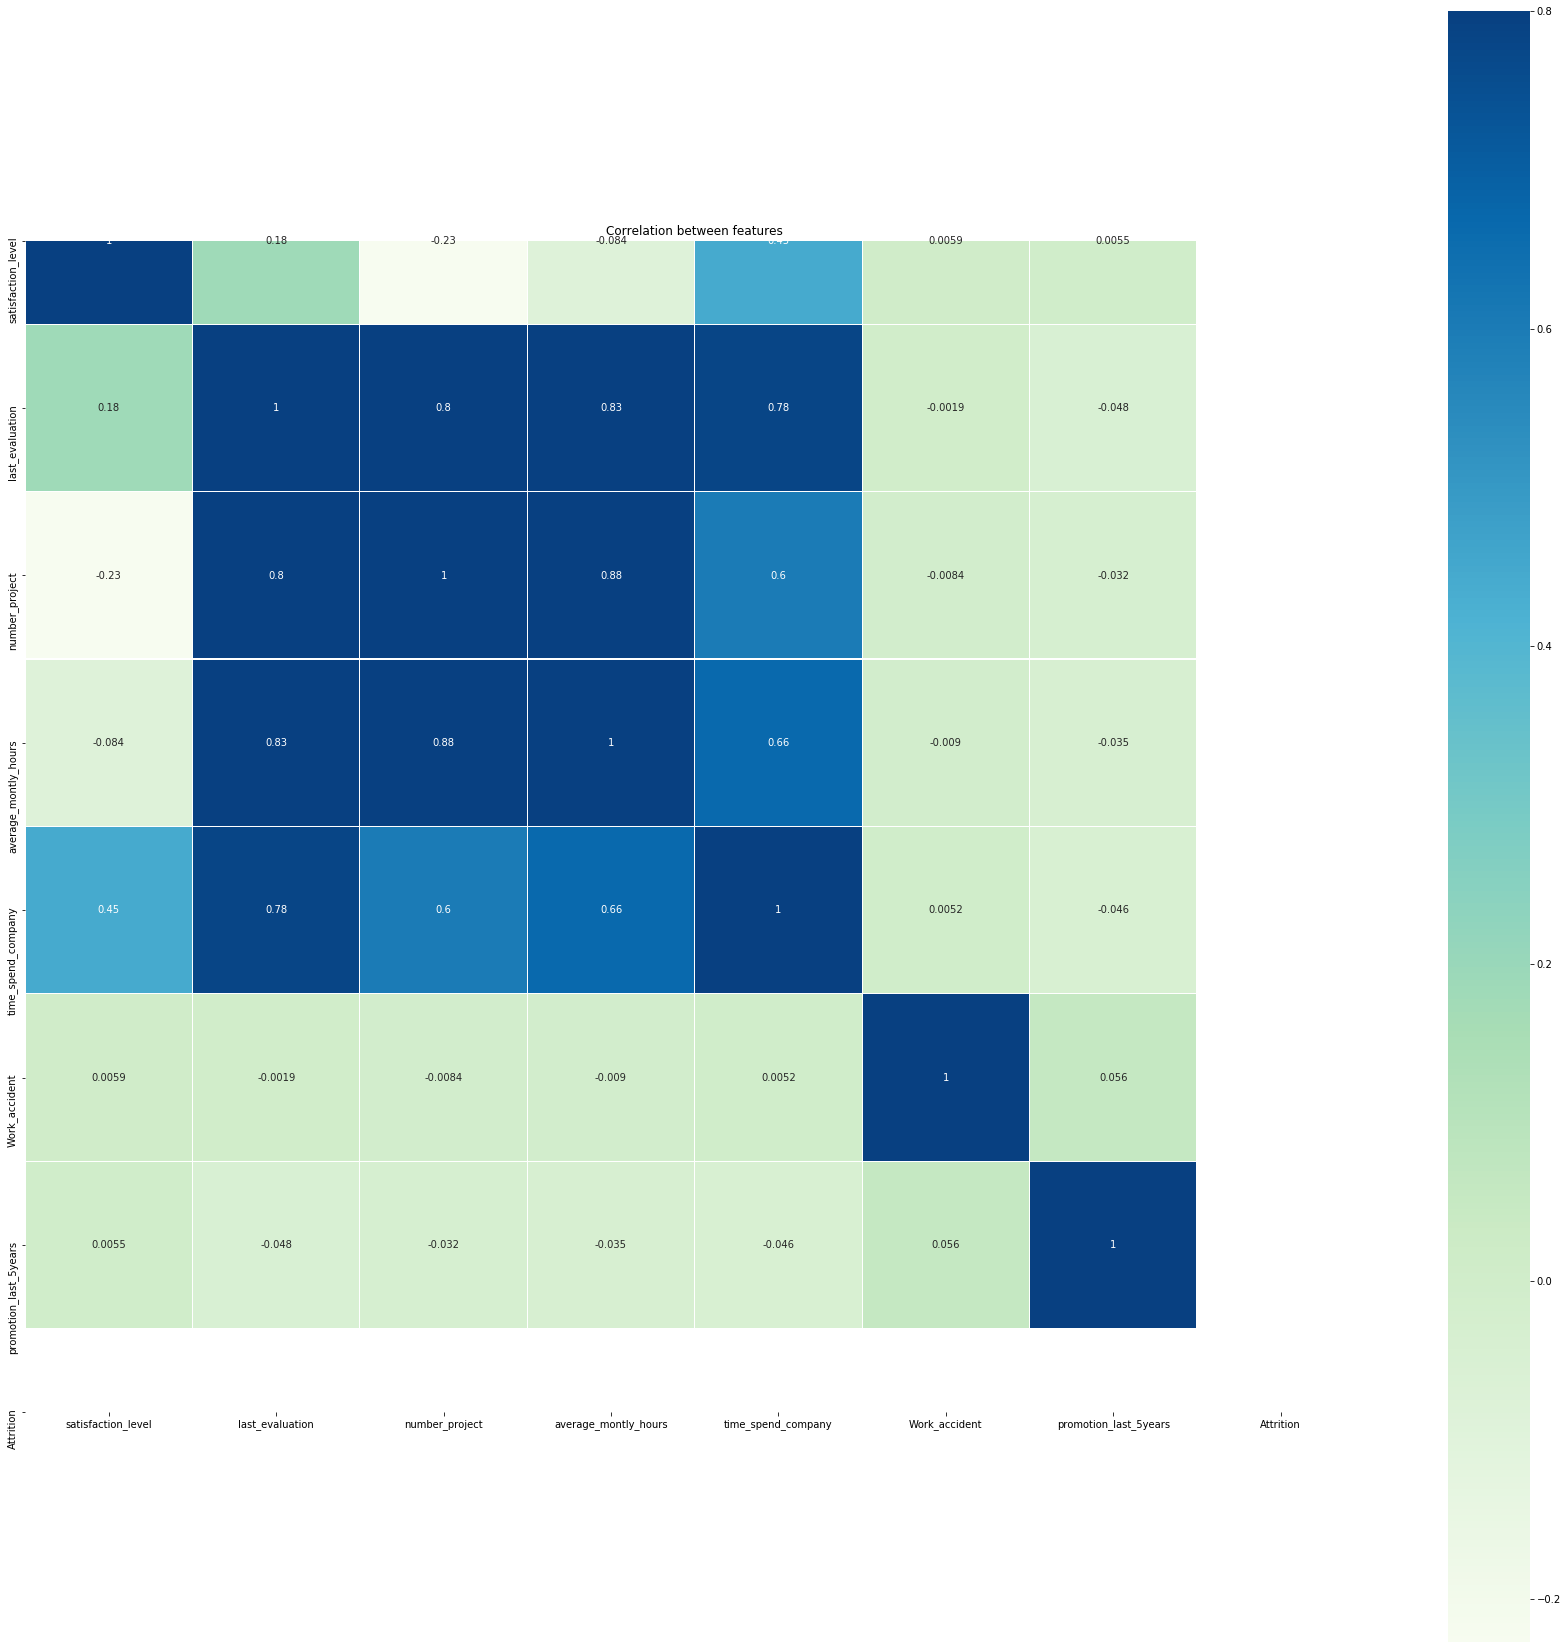

In [58]:
# Checking Correlation and correlation plot
df = data1.drop('Emp ID',axis=1)
corr=df.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

In [59]:
corr[(corr >= 0.5) | (corr <= -0.5)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
satisfaction_level,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,NaN,1.000000,0.804155,0.830336,0.783873,NaN,NaN,NaN
number_project,NaN,0.804155,1.000000,0.875194,0.601989,NaN,NaN,NaN
average_montly_hours,NaN,0.830336,0.875194,1.000000,0.664011,NaN,NaN,NaN
time_spend_company,NaN,0.783873,0.601989,0.664011,1.000000,NaN,NaN,NaN
Work_accident,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
promotion_last_5years,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Attrition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'Correlation between features')

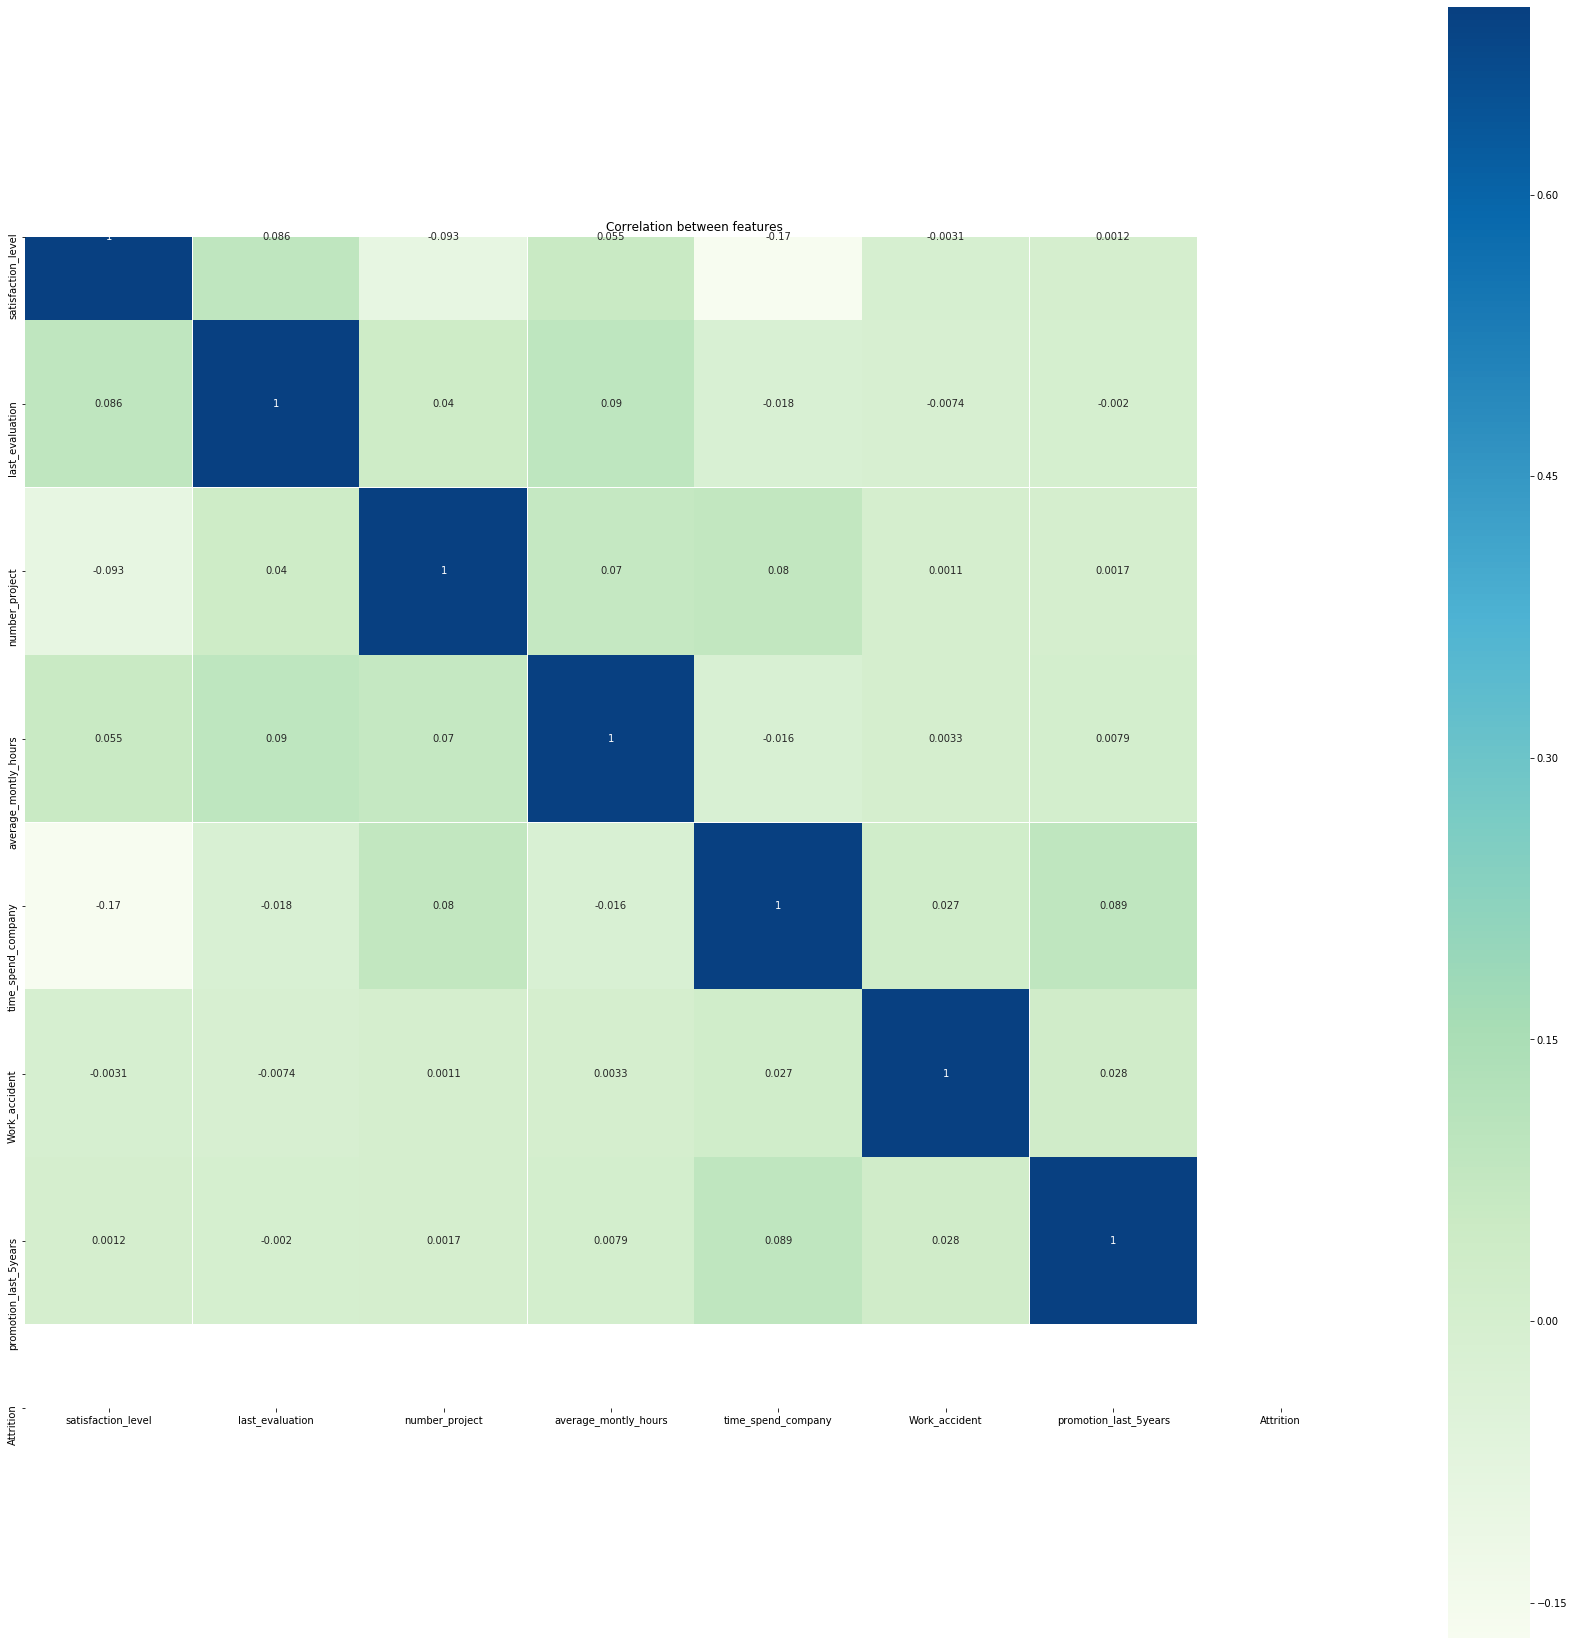

In [60]:
# Checking Correlation and correlation plot
df = data.drop('Emp ID',axis=1)
corr=df.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr, vmax=.7, linewidths=0.001,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

# Logistic Regression

In [61]:
new_data['salary'] = new_data['salary'].replace({'low':1,'medium':2,'high':3})

In [62]:
X = new_data.drop(['Attrition','Emp ID','dept'],axis=1)
y =new_data.iloc[:, new_data.columns == 'Attrition']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=0)
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (10499, 8)
X_test  (4500, 8)
y_train  (10499, 1)
y_test  (4500, 1)


In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Dhyan Somaiya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dhyan Somaiya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predictions = model.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[3198,  264],
       [ 671,  367]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,predictions)*100,2),"% accuracy")

79.22 % accuracy


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
predictions = model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,predictions)

array([[3394,   68],
       [  30, 1008]], dtype=int64)

In [71]:
print(round(accuracy_score(y_test,predictions)*100,2),"% accuracy")

97.82 % accuracy
